In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("data-final-clean.csv")

In [3]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
874362,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
874363,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
874364,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


In [4]:
data_sample = data.drop('country', axis=1).sample(n=15000, random_state=1)

In [5]:
from yellowbrick.cluster import KElbowVisualizer

In [6]:
from sklearn.cluster import KMeans

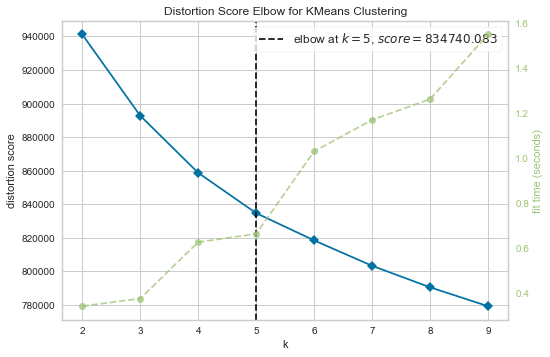

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans()
elbow = KElbowVisualizer(model, k=(2,10)) ## Change the tuple (x,y) to check different values of cluets

elbow.fit(data_sample) ## I receive an error before because of nan values in the data.
                                                  ## so I filled the nan values with 3
elbow.show()

In [8]:
model = KMeans(n_clusters=5)

In [9]:
model.fit(data.drop('country', axis=1))

KMeans(n_clusters=5)

In [10]:
predictions = model.labels_
data['cluster'] = predictions

In [11]:
data['cluster'].value_counts()

0    192960
2    183137
4    180622
1    169375
3    148272
Name: cluster, dtype: int64

In [12]:
data[['country', 'cluster']].loc[data['country']=='AU'].groupby(by='cluster').count()

,country
cluster,
0,9684
1,7866
2,9546
3,7164
4,9084


In [13]:
col_list = list(data.drop("country", axis=1))
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [14]:
data_sum = pd.DataFrame()
data_sum['extroversion'] = data[ext].sum(axis=1)/10
data_sum['neurotic'] = data[est].sum(axis=1)/10
data_sum['agreeable'] = data[agr].sum(axis=1)/10
data_sum['conscientious'] = data[csn].sum(axis=1)/10
data_sum['open'] = data[opn].sum(axis=1)/10

data_sum_cluster = pd.DataFrame()
data_sum_cluster['extroversion'] = data[ext].sum(axis=1)/10
data_sum_cluster['neurotic'] = data[est].sum(axis=1)/10
data_sum_cluster['agreeable'] = data[agr].sum(axis=1)/10
data_sum_cluster['conscientious'] = data[csn].sum(axis=1)/10
data_sum_cluster['open'] = data[opn].sum(axis=1)/10
data_sum_cluster['cluster'] = predictions
data_sum_cluster['country'] = data['country']

In [15]:
data_sum

,extroversion,neurotic,agreeable,conscientious,open
0,3.0,2.4,3.1,3.2,3.3
1,3.4,2.1,3.2,3.1,2.7
2,2.9,2.6,2.8,2.8,3.1
3,2.6,2.7,3.2,2.7,3.1
4,3.5,2.3,3.0,3.2,3.6
...,...,...,...,...,...
874361,3.2,3.3,3.6,3.1,2.9
874362,3.4,4.0,3.3,2.8,3.3
874363,3.3,2.7,3.5,3.3,3.6
874364,2.8,3.3,3.1,3.0,3.5


In [16]:
data_sum_cluster.groupby('cluster').mean()

,extroversion,neurotic,agreeable,conscientious,open
cluster,,,,,
0,3.074748,3.427101,3.306376,3.219273,3.366944
1,2.970123,3.660149,3.156918,3.179480,3.250174
2,3.089837,2.426315,3.214220,3.114820,3.335142
3,3.001930,2.614480,2.953557,3.028436,3.252038
4,3.053668,3.035198,3.198946,3.167434,3.242065


From these values, we can see some differences already. Like the data from Neurotic and Agreeable

In [17]:
data_cluster = data_sum_cluster.groupby('cluster').mean()

In [18]:
data_cluster.iloc[:,2]

cluster
0    3.306376
1    3.156918
2    3.214220
3    2.953557
4    3.198946
Name: agreeable, dtype: float64

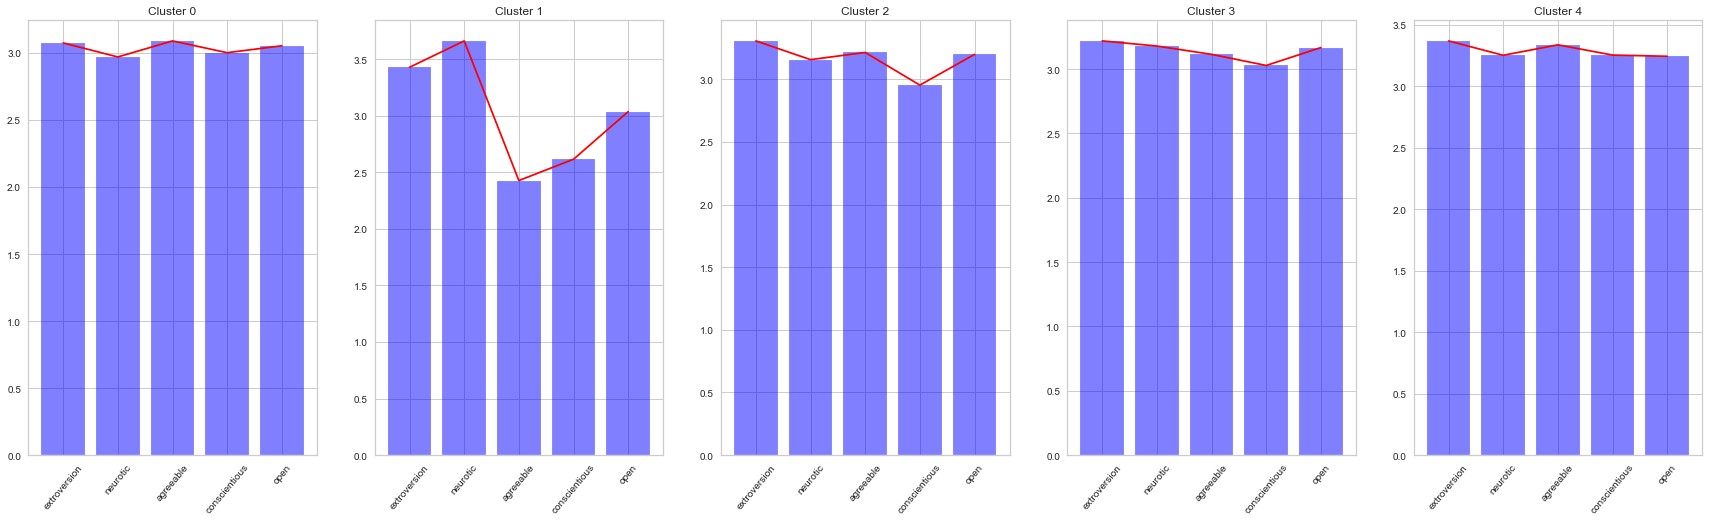

In [19]:
fig = plt.figure(figsize=(30,8))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.bar(data_cluster.columns, data_cluster.iloc[:,i], color='blue', alpha=0.5)
    plt.plot(data_cluster.columns, data_cluster.iloc[:,i], color='red')
    plt.title("Cluster "+str(i))
    plt.xticks(rotation=50)

Unfortunatelly, the data doesn't share the groups in which each person belongs to, so we can just divide them by Clusters, without really knowing more.

What we can do is try to predict someone cluster and then go to the graph and see which characteristics stands out.

In [36]:
answers = list()

for i in range(0,50):
    answers.append(np.random.randint(1,5))

answers = np.transpose(answers).reshape(1,-1)
answers

array([[3, 1, 3, 3, 4, 1, 4, 1, 3, 4, 1, 1, 3, 3, 1, 1, 2, 2, 4, 1, 4, 2,
        1, 2, 4, 2, 2, 2, 3, 4, 2, 1, 4, 1, 3, 3, 2, 2, 1, 4, 1, 4, 4, 3,
        2, 1, 3, 1, 3, 2]])